In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cnn-model/README.dataset.txt
/kaggle/input/cnn-model/README.roboflow.txt
/kaggle/input/cnn-model/valid/Gall_Midge/IMG_20211106_163038-Custom-_jpg.rf.2cacb24c333103f04d97863cb9663f79.jpg
/kaggle/input/cnn-model/valid/Gall_Midge/IMG_20211106_163630-Custom-_jpg.rf.3ec5159aadb517bc1c5eb08430cacc95.jpg
/kaggle/input/cnn-model/valid/Gall_Midge/Gall-Midge00162_JPG.rf.ee13e0d7add58363ff3ea0ec2c320761.jpg
/kaggle/input/cnn-model/valid/Gall_Midge/IMG_20211106_162407-Custom-_jpg.rf.92a269973a7041b8fddeebc223206ce8.jpg
/kaggle/input/cnn-model/valid/Gall_Midge/IMG_20211106_163803-Custom-_jpg.rf.88bc3dcb6e7503cba660a47d0721efcb.jpg
/kaggle/input/cnn-model/valid/Gall_Midge/IMG_20211106_162834-Custom-_jpg.rf.8482647b215ced32e2a4c78da00bcd3d.jpg
/kaggle/input/cnn-model/valid/Gall_Midge/Gall-Midge00131_JPG.rf.4badbc83e35dc683a8059cb2e7a27f80.jpg
/kaggle/input/cnn-model/valid/Gall_Midge/IMG_20211106_164032-Custom-_jpg.rf.268ab41e61044da115b7e53b13f7c699.jpg
/kaggle/input/cnn-model/valid/Gal

In [1]:
#!rm -rf /kaggle/working/*


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [5]:
train_dir = "/kaggle/input/cnn-model/train"
valid_dir = "/kaggle/input/cnn-model/valid"
test_dir = "/kaggle/input/cnn-model/test"

batch_size = 32
img_size = (224, 224)  # Adjust for ResNet, VGG, MobileNet

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')

valid_generator = valid_datagen.flow_from_directory(
    valid_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')


Found 3758 images belonging to 6 classes.
Found 360 images belonging to 6 classes.


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [11]:
# ✅ Define the CNN model
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(6, activation="softmax")  # Change '6' to the number of classes in your dataset
])

# ✅ Compile the model
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# ✅ Train the model
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=50
)



Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


118/118 ━━━━━━━━━━━━━━━━━━━━ 27s 171ms/step - accuracy: 0.3076 - loss: 1.8079 - val_accuracy: 0.6444 - val_loss: 1.0030
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 13s 101ms/step - accuracy: 0.6861 - loss: 0.7940 - val_accuracy: 0.8944 - val_loss: 0.4488
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 13s 107ms/step - accuracy: 0.7826 - loss: 0.5590 - val_accuracy: 0.9000 - val_loss: 0.4156
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 14s 108ms/step - accuracy: 0.8765 - loss: 0.3519 - val_accuracy: 0.8611 - val_loss: 0.4297
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 13s 102ms/step - accuracy: 0.9114 - loss: 0.2417 - val_accuracy: 0.9000 - val_loss: 0.3873
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 13s 102ms/step - accuracy: 0.9422 - loss: 0.1706 - val_accuracy: 0.9056 - val_loss: 0.4042
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 13s 103ms/step - accuracy: 0.9553 - loss: 0.1286 - val_accuracy: 0.9056 - val_loss: 0.3340
Epoch 8/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 13s 106ms/step - accuracy: 0.9701 - loss: 0.0896 - val

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = "/kaggle/input/cnn-model/test"  # Update this path

# Define ImageDataGenerator for test set (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # No need to shuffle for evaluation
)


Found 180 images belonging to 6 classes.


In [13]:
import numpy as np

# Predict class probabilities
y_pred_prob = model.predict(test_generator)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Get the true labels
y_true = test_generator.classes


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 325ms/step


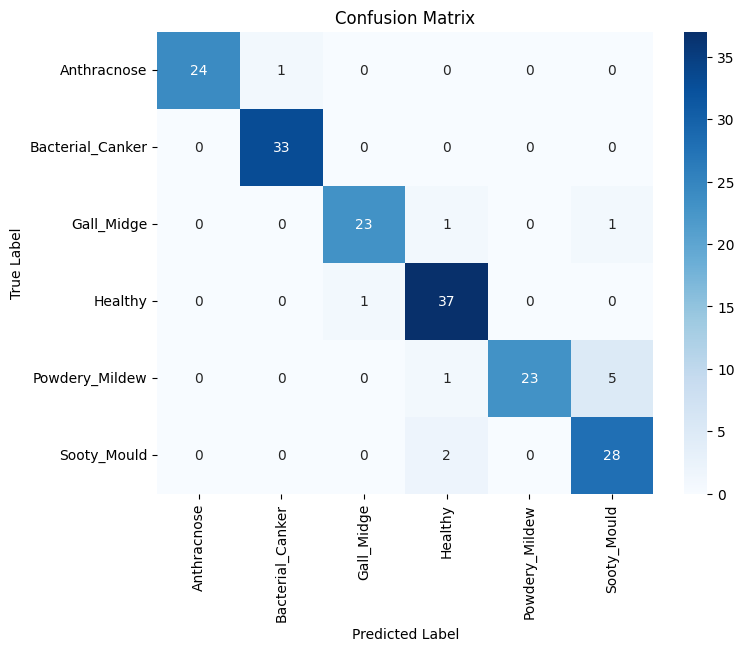

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [15]:
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=class_labels))


Classification Report:
                   precision    recall  f1-score   support

     Anthracnose       1.00      0.96      0.98        25
Bacterial_Canker       0.97      1.00      0.99        33
      Gall_Midge       0.96      0.92      0.94        25
         Healthy       0.90      0.97      0.94        38
  Powdery_Mildew       1.00      0.79      0.88        29
     Sooty_Mould       0.82      0.93      0.87        30

        accuracy                           0.93       180
       macro avg       0.94      0.93      0.93       180
    weighted avg       0.94      0.93      0.93       180



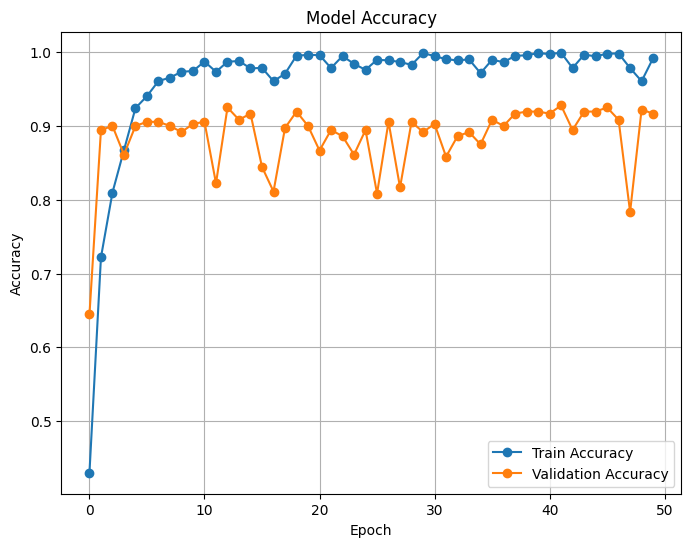

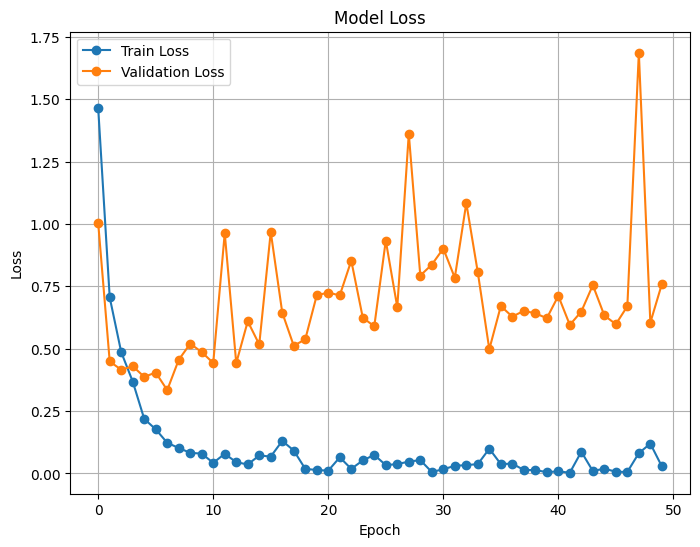

In [16]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Accuracy Plot
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Loss Plot
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Train Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function to plot graphs
plot_training_history(history)


In [17]:
model.save("mango_disease_cnn.h5")


In [18]:
import tensorflow as tf

tf.saved_model.save(model, "mango_disease_cnn")


In [20]:
import shutil
from IPython.display import FileLink

# Specify the folder you want to zip (typically 'runs/detect/train' or similar if you're training YOLO)
output_folder = '/kaggle/working'  # Replace with the folder you want to zip
zip_filename = 'ObjectDetection1_output.zip'   # The name of the zip file

# Zip the folder
shutil.make_archive(zip_filename.replace('.zip', ''), 'zip', output_folder)

# Generate a download link for the zip file
FileLink(zip_filename)

/kaggle/working/ObjectDetection1_output.zip

In [27]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Load the trained model
model = tf.keras.models.load_model("/kaggle/working/mango_disease_cnn.h5")

# Path to your test image (Change this to an actual image path)
image_path = "/kaggle/input/predtct-on-unseenn-data/mango predict/powdery mildw.jpg"

# Load and preprocess the image
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)  # Convert to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize (same as during training)

# Predict the class
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)  # Get class index

# Get class labels
class_labels = list(test_generator.class_indices.keys())  # Use test_generator from previous steps
predicted_label = class_labels[predicted_class]

print(f"Predicted Class: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
Predicted Class: Powdery_Mildew
